<a href="https://colab.research.google.com/github/kprains/MM_2024/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ Практика 2: Статистика в действии и её влияние на модель

## **Цель занятия:**
Изучить, как статистические метрики (среднее, медиана, квантили, размер выборки, стандартное отклонение) влияют на анализ данных и построение моделей машинного обучения. На практике мы проведем анализ целевой переменной **Y**, обучим модель линейной регрессии и исследуем влияние статистических характеристик на метрики модели.

## **Задание состоит из следующих частей:**
1. Анализ целевой переменной **Y** с точки зрения статистики. (в нашем случае - бинарная классификация)
2. Анализ пропусков
2. Изучение влияния статистических метрик на данные.
3. Обучение модели линейной регрессии и оценка ее точности.
4. Проведение теста Пирсона.
5. Визуализация результатов и анализ влияния статистики на метрики модели.
6. Валидация модели
---

## 1. Анализ целевой переменной Y с точки зрения статистики

### **Описание:**
В этом разделе вы проведете статистический анализ целевой переменной **Y**, изучите ее распределение и основные статистические характеристики.

1. **Импортируйте необходимые библиотеки:**

In [2]:
!pip install pandas scikit-learn seaborn scipy

In [3]:
   import pandas as pd
   import numpy as np
   import matplotlib.pyplot as plt
   import seaborn as sns
   from scipy import stats

2. **Загружаем набор данных:**

In [4]:
# Загрузка набора данных
df = pd.read_csv('/content/income.csv')

In [5]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [6]:
# для удобства распечатаем все колонки
for column in df.columns:
  print(f'колонка: {column}')

колонка: age
колонка: workclass
колонка: education
колонка: education-num
колонка: marital-status
колонка: occupation
колонка: relationship
колонка: race
колонка: sex
колонка: capital-gain
колонка: capital-loss
колонка: hours-per-week
колонка: native-country
колонка: income >50K


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  31978 non-null  object
 13  income >50K     32561 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


3. **Проверьте наличие пропущенных значений и работа с пропусками для числовых:**

In [8]:
# Проверка на пропущенные значения
print(df.isnull().sum()) # пропусков нет

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income >50K          0
dtype: int64


In [ ]:
# генерируем случайную последовательность
# np.random.seed(42)
# df_test_nan = df.copy()
# df_test_nan.loc[np.random.choice(df_test_nan.index, size=5, replace=True), 'alcohol'] = np.nan

In [10]:
# Проверка на пропущенные значения
#print(df_test_nan.isnull().sum()) # пропусков нет

In [9]:
# Вариант 1: Удаление строк с пропусками
df_drop = df.dropna()
print("\n# Удаление строк с пропусками")
print(df_drop.isnull().sum()) # пропусков нет


# Удаление строк с пропусками
age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income >50K       0
dtype: int64


In [10]:
# Вариант 2: Заполнение пропусков медианой
df_median = df.copy()
# этом коде мы используем mode() вместо median(), что возвращает наиболее частое значение в столбце.является категориальным признаком
df_median.workclass = df_median.workclass.fillna(df_median.workclass.mode()[0])
df_median.occupation = df_median.occupation.fillna(df_median.occupation.mode()[0])
df_median['native-country'] = df_median['native-country'].fillna(df_median['native-country'].mode()[0])

print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum()) # пропусков нет


# Заполнение пропусков медианой
age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income >50K       0
dtype: int64


In [15]:
import pandas as pd
from sklearn.impute import KNNImputer

# Создание копии DataFrame
df_mean = df.copy()

# Преобразуем все категориальные переменные в числовые для KNN
# Убедитесь, что все переменные, которые являются категориальными, кодируются
categorical_cols = ['workclass', 'occupation', 'native-country', 'education', 'marital-status', 'relationship', 'race', 'sex']
df_mean_encoded = pd.get_dummies(df_mean, columns=categorical_cols, drop_first=True)

# Проверка типов данных
print("Типы данных перед KNNImputer:")
print(df_mean_encoded.dtypes)

# Убедимся, что все данные числовые
df_mean_encoded = df_mean_encoded.apply(pd.to_numeric, errors='coerce')

# Инициализация KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Проведение иммитации KNN
try:
    df_mean_imputed = imputer.fit_transform(df_mean_encoded)
except Exception as e:
    print(f"Произошла ошибка: {e}")

# Преобразуем обратно в DataFrame
df_mean_imputed = pd.DataFrame(df_mean_imputed, columns=df_mean_encoded.columns)

# Проверяем, заполнены ли пропуски
print("\n# Заполнение пропусков с помощью KNN")
print(df_mean_imputed.isnull().sum())

Типы данных перед KNNImputer:
age                        int64
education-num              int64
capital-gain               int64
capital-loss               int64
hours-per-week             int64
                           ...  
race_Asian-Pac-Islander     bool
race_Black                  bool
race_Other                  bool
race_White                  bool
sex_Male                    bool
Length: 97, dtype: object

# Заполнение пропусков с помощью KNN
age                        0
education-num              0
capital-gain               0
capital-loss               0
hours-per-week             0
                          ..
race_Asian-Pac-Islander    0
race_Black                 0
race_Other                 0
race_White                 0
sex_Male                   0
Length: 97, dtype: int64


⏰ Заполнение категориальных признаков происходит с помощью ```df.category_variable.mode() (как один из вариантов, хотя и считается недостаточно хорошим).```

Как вариант - можно использовать KNN (K-ближайших соедей)

4. **Выбираем целвую переменную**

⏰ В качестве целевой выбираем категориальную переменную, либо превращаем числовую в категориальное

```В моем датасете была выбрана целевая переменная specialist -> которая была преобразована из education-num (если качество лет >= 9, то работник считается лучшим, иначе не лучшее)```

In [16]:
df['specialist'] = np.where(df['education-num'] >= 9, 1, 0).astype(int)

In [17]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income >50K',
       'specialist'],
      dtype='object')

In [24]:
Y = df['specialist'] # выбираем целевую переменную (категориальную)
X = df.drop('specialist', axis=1) # переменные для проверки влияния

# В моем случае я дропаю базовую переменную, а не только. Y
X = X.drop('education-num', axis=1)

5. **Графический анализ**

In [21]:
# Список числовых колонок для построения графиков
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,age,education-num,capital-gain,capital-loss,hours-per-week,income >50K
0,39,13,2174,0,40,0
1,50,13,0,0,13,0
2,38,9,0,0,40,0
3,53,7,0,0,40,0
4,28,13,0,0,40,0
...,...,...,...,...,...,...
32556,27,12,0,0,38,0
32557,40,9,0,0,40,1
32558,58,9,0,0,40,0
32559,22,9,0,0,20,0


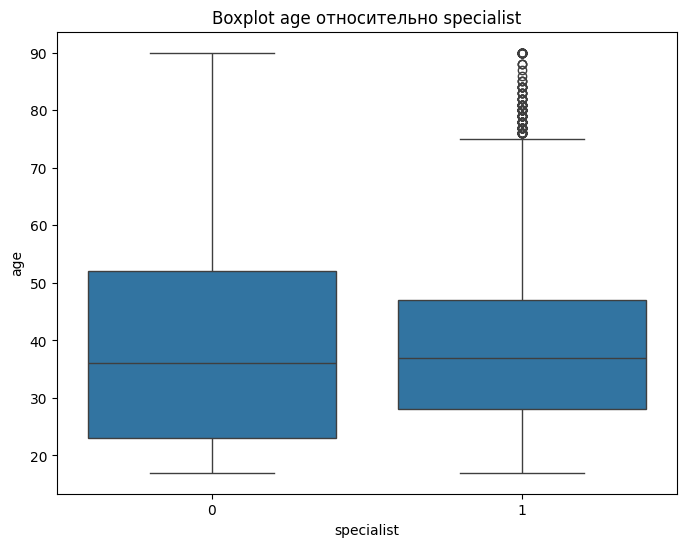

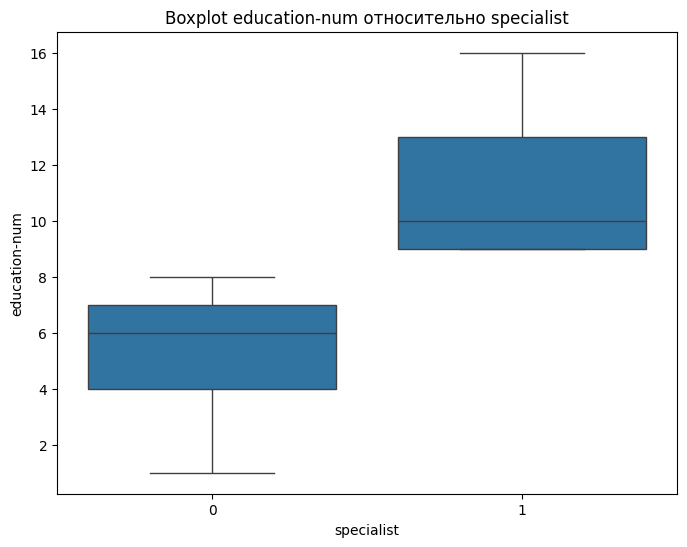

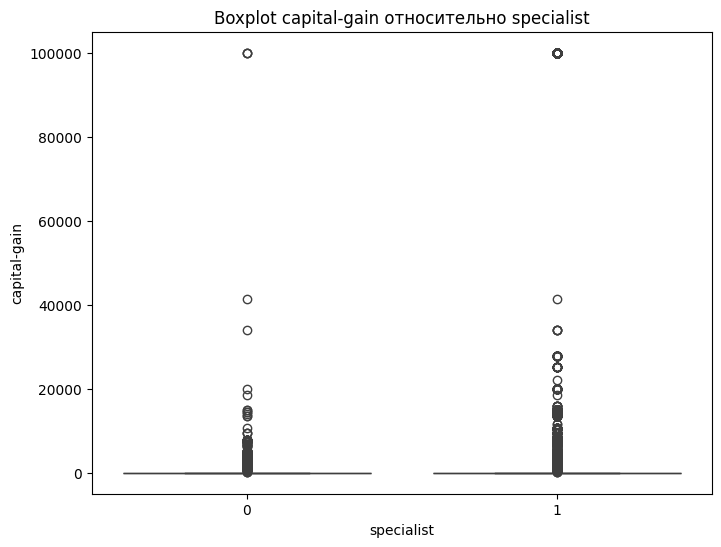

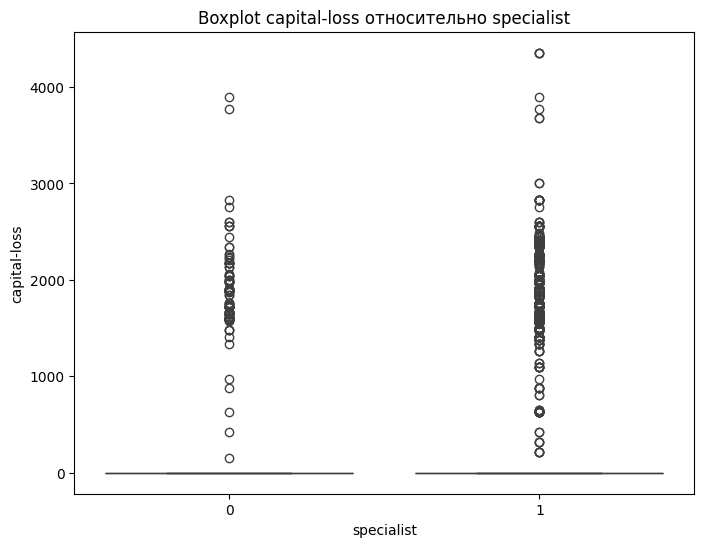

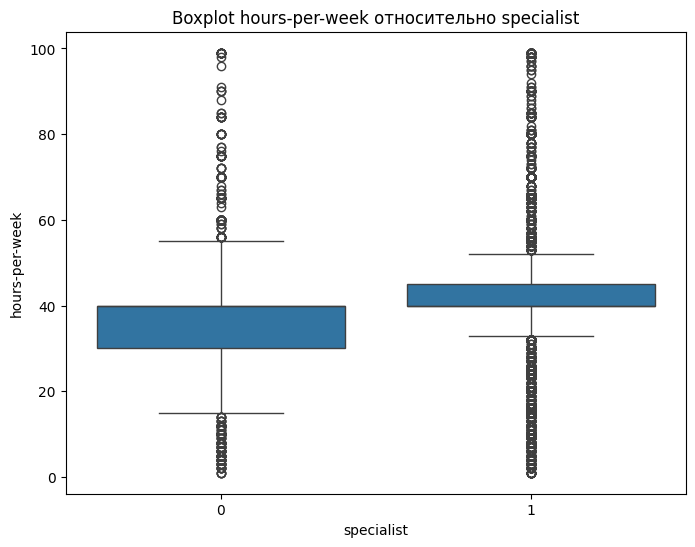

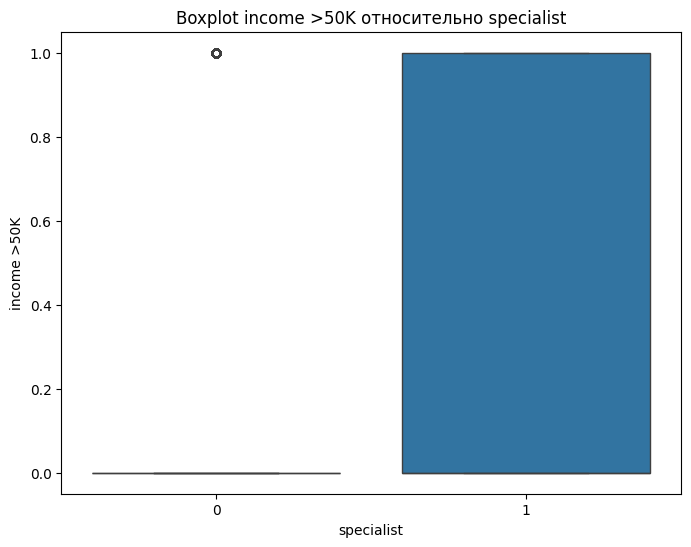

In [25]:
# Построение boxplot для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='specialist', y=col, data=df)
    plt.title(f'Boxplot {col} относительно specialist')
    plt.show()

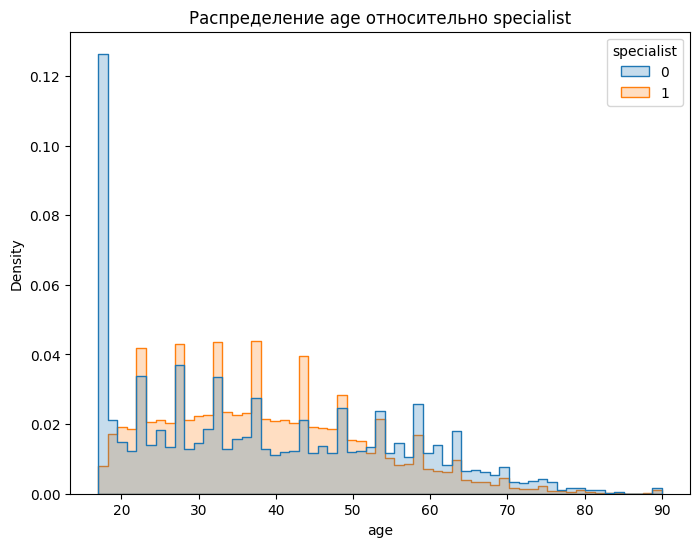

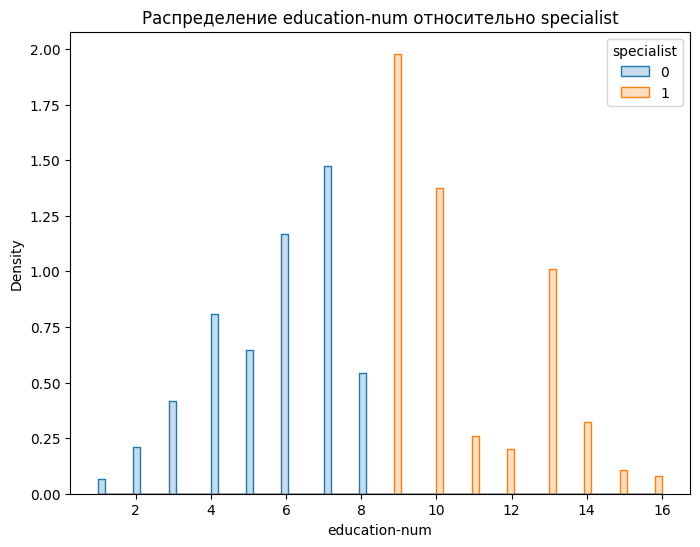

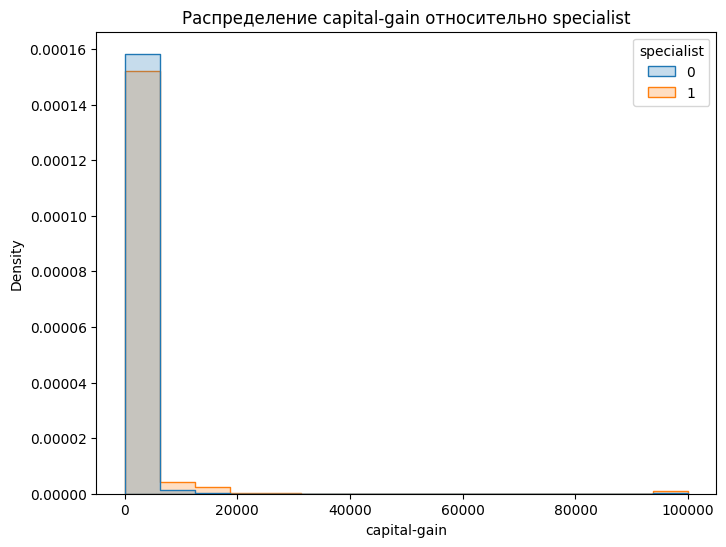

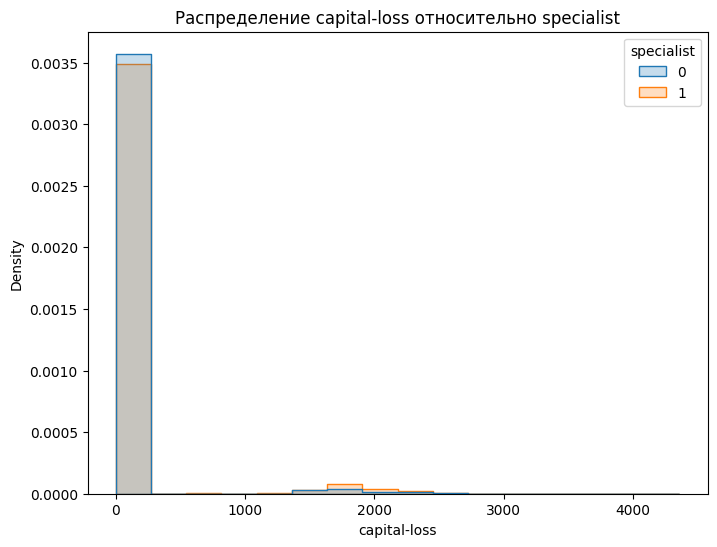

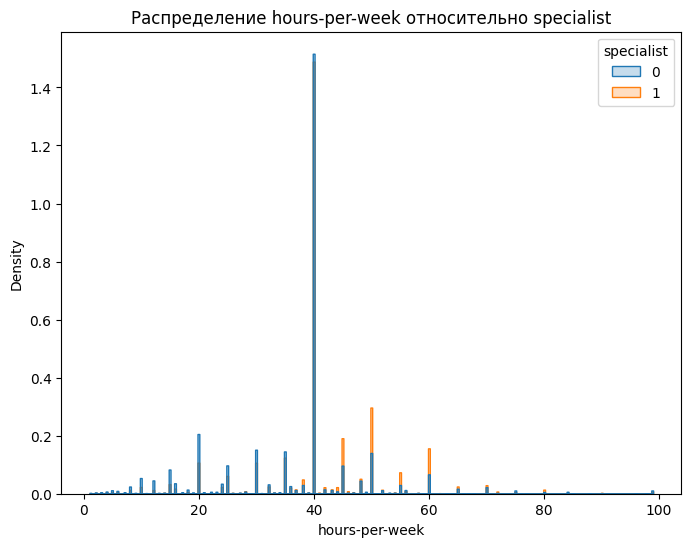

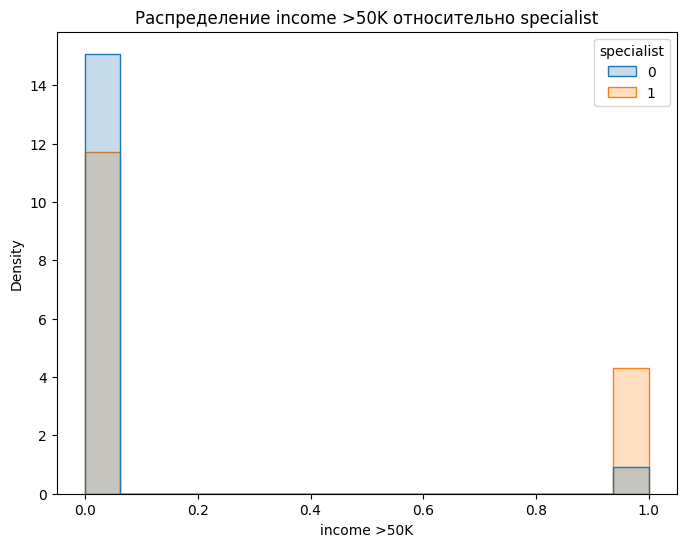

In [26]:
# Построение диаграмм распределения для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='specialist', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно specialist')
    plt.show()

⏰ проанализировать график, выделить значимые признаки относительно Y

In [27]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('specialist')[df.select_dtypes(include=[np.number]).columns].describe()

# Описательная статистика для категориальных переменных, разделенная по целевой переменной
desc_stats_categorical = df.groupby('specialist')[df.select_dtypes(include=['object']).columns].describe()

### Описание полученных результатов
⏰ ```Необходимо сделать подобное описание для своих переменных```

In [28]:
# Проходим по каждой числовой переменной и выводим статистику отдельно
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('specialist')[col].describe())
    print("\n" + "="*50 + "\n")


Описательная статистика для age:

              count       mean        std   min   25%   50%   75%   max
specialist                                                             
0            4253.0  38.422525  16.877413  17.0  23.0  36.0  52.0  90.0
1           28308.0  38.605553  13.085296  17.0  28.0  37.0  47.0  90.0


Описательная статистика для education-num:

              count       mean       std  min  25%   50%   75%   max
specialist                                                          
0            4253.0   5.602398  1.700303  1.0  4.0   6.0   7.0   8.0
1           28308.0  10.753497  1.926970  9.0  9.0  10.0  13.0  16.0


Описательная статистика для capital-gain:

              count         mean          std  min  25%  50%  75%      max
specialist                                                                
0            4253.0   283.507407  2992.363566  0.0  0.0  0.0  0.0  99999.0
1           28308.0  1196.960824  7828.365320  0.0  0.0  0.0  0.0  99999.0


Описатель

In [29]:
print("\nКатегориальные переменные:")
desc_stats_categorical


Категориальные переменные:


workclass                        education                         \
               count unique      top   freq     count unique      top   freq   
specialist                                                                     
0               3825      8  Private   3205      4253      8     11th   1175   
1              26900      8  Private  19491     28308      8  HS-grad  10501   

           marital-status         ...   race           sex               \
                    count unique  ...    top   freq  count unique   top   
specialist                        ...                                     
0                    4253      6  ...  White   3481   4253      2  Male   
1                   28308      7  ...  White  24335  28308      2  Male   

                  native-country                               
             freq          count unique            top   freq  
specialist                                                     
0            2932           4169     36  United-States   3334  
1           18858          27809     41  United-States  25836  

[2 rows x 32 columns]

#### **Возраст (Age)**:
Средний возраст людей с низким уровнем образования (more_educated = 0) составляет 38.42 года, что немного ниже, чем у более образованных людей (more_educated = 1), где средний возраст равен 38.61 года. Стандартное отклонение в первой группе (16.88) выше, чем во второй (13.09), что указывает на большую вариативность в возрасте среди менее образованных людей. Минимальные и максимальные значения возраста в обеих группах совпадают (17 и 90 лет соответственно), что говорит о наличии схожего диапазона возрастов.

#### **Прибыль от капитала (Capital Gain)**:
Средняя прибыль от капитала у людей с низким уровнем образования значительно ниже (283.51) по сравнению с более образованными (1196.96). Стандартное отклонение в первой группе (2992.36) указывает на большую разбросанность значений, в то время как во второй группе (7828.37) разброс еще больше. Это может свидетельствовать о том, что более образованные люди имеют больше возможностей для получения прибыли от капитала, но также указывает на наличие значительных выбросов в обеих группах.

#### **Убыток от капитала (Capital Loss)**:
Средний убыток от капитала для менее образованных людей составляет 51.13, в то время как для более образованных он равен 92.74. Это может указывать на то, что более образованные люди сталкиваются с большими финансовыми потерями, возможно, из-за более активного участия в инвестициях. Стандартное отклонение в обеих группах также указывает на наличие значительных вариаций в убытках.

#### **Часы работы в неделю (Hours-per-week)**:
Люди с низким уровнем образования работают в среднем 36.72 часа в неделю, что меньше, чем 40.99 часов у более образованных. Стандартное отклонение в первой группе (13.35) больше, чем во второй (12.09), что говорит о большей вариативности в количестве рабочих часов среди менее образованных людей. Минимальные значения в обеих группах равны 1 часу, а максимальные — 99 часов.

#### **Доход выше 50K (Income >50K)**:
Доля людей с доходом выше 50K среди менее образованных составляет всего 5.74%, в то время как среди более образованных она значительно выше — 26.84%. Стандартное отклонение в первой группе (0.23) указывает на низкую вариативность, тогда как во второй группе (0.44) вариативность выше, что может говорить о большем количестве людей с высоким доходом.

#### **Вывод**:
На основе представленных данных можно сделать следующие выводы о влиянии уровня образования на различные финансовые показатели:

Более образованные люди имеют чуть больший средний возраст, но с меньшей вариативностью.
Они значительно превосходят менее образованных по средней прибыли от капитала и имеют более высокие показатели дохода.
Убытки от капитала также выше у более образованных, что может указывать на более активное инвестирование.
Более образованные люди работают больше часов в неделю, что может быть связано с их более высокими доходами.


## 2. Расчет теста Пирсона

### **Описание:**
Вы рассчитаете коэффициенты корреляции Пирсона между Y и каждым из признаков X, чтобы оценить значимость этих корреляций.

### **Шаги:**

1. **Рассчитайте коэффициенты корреляции Пирсона для каждого признака:**

In [30]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,age,education-num,capital-gain,capital-loss,hours-per-week,income >50K,specialist
age,1.000000,0.036527,0.077674,0.057775,0.068756,0.234037,0.004522
education-num,0.036527,1.000000,0.122630,0.079923,0.148123,0.335154,0.674712
capital-gain,0.077674,0.122630,1.000000,-0.031615,0.078409,0.223329,0.041680
capital-loss,0.057775,0.079923,-0.031615,1.000000,0.054256,0.150526,0.034798
hours-per-week,0.068756,0.148123,0.078409,0.054256,1.000000,0.229689,0.116767
income >50K,0.234037,0.335154,0.223329,0.150526,0.229689,1.000000,0.166292
specialist,0.004522,0.674712,0.041680,0.034798,0.116767,0.166292,1.000000


2. ⏰ **Интерпретируйте результаты:**


### Интерпретация:
Корреляция между age и другими признаками:

Корреляция с income >50K (0.234) указывает на слабую положительную зависимость: с возрастом вероятность получения дохода выше 50K увеличивается.
Корреляция с education-num (0.036) близка к нулю, что намекает на отсутствие связи между возрастом и уровнем образования.
Корреляция между education-num и другими признаками:

Значение 1.000 с самим собой очевидно.
Корреляция с income >50K (0.335) более значима, указывая на умеренную положительную связь: более высокий уровень образования связан с большей вероятностью получения дохода выше 50K.
Корреляция с specialist (0.675) также указывает на сильную положительную связь — повышение уровня образования выражается в вероятности иметь квалификацию специалиста.
Корреляция между capital-gain и другими признаками:

Корреляция с income >50K (0.223) также указывает на слабую зависимость: более высокие капитальные приросты могут быть связаны с более высоким доходом.
Низкие значения корреляции с другими признаками указывают на то, что капитальные доходы не сильно связаны с возрастом или уровнем образования.
Корреляция между capital-loss и другими признаками:

Корреляция с income >50K (0.151) демонстрирует слабую положительную зависимость: потеря капитала немного связана с уровнями дохода.
Все остальные корреляции с capital-loss меньшего размера, что указывает на отсутствие сильной связи с другими переменными.
Корреляция между hours-per-week и другими признаками:

С income >50K (0.229) наблюдается слабая положительная связь: большее количество рабочих часов в неделю связано с большей вероятностью получения дохода выше 50K.
Корреляция с education-num (0.148) говорит о том, что более высокие уровни образования могут быть связаны с большими рабочими часами, но связь также является слабой.
Корреляция между specialist и другими признаками:

Корреляция с education-num (0.675) указывает на то, что наличие квалификации специалиста тесно связано с уровнем образования.
Корреляция с income >50K (0.166) указывает на слабую связь, что подтверждает, что наличие квалификации несколько помогает в повышении дохода.
###*Заключение*
В целом, из результатов видно, что наиболее значимые корреляции связаны с education-num и income >50K, что подтверждает ожидаемые связи — более высокий уровень образования, как правило, приводит к увеличению дохода и вероятности квалификации как специалиста. Корреляции между других переменных остаются относительно слабыми, с небольшими значениями, указывая на то, что есть некоторые связи, но они не являются статистически значимыми для тяжелого анализа.

### Описание корреляций для значимых признаков:



1. **age и income >50K** (0.234):
Наблюдается слабая положительная корреляция между возрастом и вероятностью получения дохода выше 50K. Это может указывать на то, что с увеличением возраста увеличивается и вероятность более высокого дохода, хотя связь не является сильной.
2. **education-num и income >50K** (0.335):
Существует умеренная положительная корреляция между уровнем образования (education-num) и доходом выше 50K. Это подтверждает общую тенденцию, что люди с более высоким уровнем образования чаще зарабатывают больше, что делает этот признак значимым для прогнозирования дохода.
3. **education-num и specialist** (0.674):
Высокая положительная корреляция между уровнем образования и принадлежностью к категории специалистов. Это логично, так как более высокий уровень образования часто связан с профессиональной квалификацией и специализацией.
4. **capital-gain и income >50K** (0.223):
Наблюдается слабая положительная корреляция между приростом капитала и доходом выше 50K. Это может указывать на то, что люди с более высокими приростами капитала имеют большую вероятность получения высокого дохода, хотя связь остается не очень сильной.
5. **hours-per-week и income >50K** (0.229):
Слабая положительная корреляция между количеством рабочих часов в неделю и доходом выше 50K. Это может говорить о том, что большее количество рабочих часов связано с вероятностью получения более высокого дохода, однако связь не является значительной.
6. **capital-loss и income >50K** (0.150):
Слабая положительная корреляция между потерями капитала и доходом выше 50K. Это может указывать на то, что наличие потерь капитала незначительно связано с вероятностью получения дохода выше 50K, но связь также не является значительной.
7. **capital-gain и education-num** (0.122):
Наблюдается очень слабая положительная корреляция между приростом капитала и уровнем образования. Это может указывать на то, что уровень образования слабо влияет на прирост капитала.
8. **specialist и income >50K** (0.166):
Слабая положительная корреляция между принадлежностью к категории специалистов и доходом выше 50K. Это может указывать на то, что специалисты имеют немного большую вероятность получать более высокий доход, однако связь остается незначительной.

### Почему мультиколлинеарность это плохо?

Мультиколлинеарность возникает, когда два или более независимых признака сильно коррелируют друг с другом. Это приводит к нескольким проблемам:

1. **Переоценка значимости признаков**:
   - Когда признаки сильно коррелированы, модель может "перепутать" влияние каждого из них на целевую переменную, что приведет к ненадежным коэффициентам. Это затрудняет интерпретацию модели, поскольку сложно понять, какой из признаков действительно важен.

2. **Нестабильность модели**:
   - При наличии мультиколлинеарности небольшие изменения в данных могут привести к большим изменениям в коэффициентах модели. Это делает модель нестабильной и менее устойчивой.

3. **Затруднение выбора значимых признаков**:
   - Модель может затрудняться при выделении важности отдельных признаков, если они сильно связаны друг с другом. Это может усложнить процесс отбора признаков и снизить точность модели.

4. **Увеличение дисперсии коэффициентов**:
   - Мультиколлинеарность увеличивает дисперсию оценок коэффициентов регрессии, что делает их менее надежными. В результате, некоторые признаки могут казаться незначимыми, хотя на самом деле они играют важную роль.

## 3. Немного машинного обучения

- отберем признаки (числовые и категориальные отдельно)
- обработаем числовые и категориальыне
- обучим модель
- узнаем что влияет на Y

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [32]:
# Выбираем категориальные признаки
categorical_features = X.select_dtypes(include=['object', 'int64']).columns.tolist()

print("Категориальные признаки:", categorical_features)


Категориальные признаки: ['age', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income >50K']


In [33]:
# Создаем копию данных
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, dtype=int, columns=categorical_features, drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


In [34]:
X_processed

,age_18,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,age_27,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income >50K_1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
32557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
32558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32559,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [35]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Числовые признаки:", numeric_features)

Числовые признаки: ['age_18', 'age_19', 'age_20', 'age_21', 'age_22', 'age_23', 'age_24', 'age_25', 'age_26', 'age_27', 'age_28', 'age_29', 'age_30', 'age_31', 'age_32', 'age_33', 'age_34', 'age_35', 'age_36', 'age_37', 'age_38', 'age_39', 'age_40', 'age_41', 'age_42', 'age_43', 'age_44', 'age_45', 'age_46', 'age_47', 'age_48', 'age_49', 'age_50', 'age_51', 'age_52', 'age_53', 'age_54', 'age_55', 'age_56', 'age_57', 'age_58', 'age_59', 'age_60', 'age_61', 'age_62', 'age_63', 'age_64', 'age_65', 'age_66', 'age_67', 'age_68', 'age_69', 'age_70', 'age_71', 'age_72', 'age_73', 'age_74', 'age_75', 'age_76', 'age_77', 'age_78', 'age_79', 'age_80', 'age_81', 'age_82', 'age_83', 'age_84', 'age_85', 'age_86', 'age_87', 'age_88', 'age_90', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'educati

In [40]:
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
if numeric_features:  # Проверяем, есть ли числовые признаки
    try:
        X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])
    except KeyError as e:
        print(f"Ошибка: {e}")
        print("Проверьте, какие колонки есть в X_processed:", X_processed.columns.tolist())
else:
    print("Нет числовых признаков для нормализации.")


In [41]:
X_processed

,age_18,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,age_27,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income >50K_1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
32558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32559,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Шаг 3: Объяснение логистической регрессии


Логистическая регрессия — это статистический метод для анализа набора данных, в котором одна или более независимых переменных определяют исход (зависимую переменную), которая является бинарной (т.е. принимает только два возможных значения, например, 0 и 1). Целью логистической регрессии является нахождение наилучшей модели, описывающей связь между независимыми переменными и вероятностью определенного исхода.

Основные характеристики:

Функция логита (логистическая функция): Используется для моделирования вероятности принадлежности наблюдения к определенному классу.
Выводы о влиянии признаков: Коэффициенты модели показывают, как изменение признака влияет на логарифм отношения шансов.

**Функция для обучения и оценки модели**

In [42]:
def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model


In [39]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 1.0000
Точность на тестовой выборке: 1.0000

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       851
           1       1.00      1.00      1.00      5662

    accuracy                           1.00      6513
   macro avg       1.00      1.00      1.00      6513
weighted avg       1.00      1.00      1.00      6513



**Пояснение:**

- Точность (Accuracy): Доля правильных предсказаний от общего числа предсказаний.
- Precision (Точность): Доля правильных положительных предсказаний среди всех положительных предсказаний.
- Recall (Полнота): Доля правильно предсказанных положительных случаев среди всех реальных положительных случаев.
- F1-score: Гармоническое среднее между точностью и полнотой.

In [43]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])


                    Feature  Coefficient
89        education_HS-grad     9.640845
93   education_Some-college     8.991599
87      education_Bachelors     7.997709
86      education_Assoc-voc     7.179568
85     education_Assoc-acdm     6.901619
..                      ...          ...
351       hours-per-week_21    -0.000391
261       capital-loss_1573     0.000041
256       capital-loss_1411     0.000000
297       capital-loss_2080     0.000000
68                   age_86     0.000000

[466 rows x 2 columns]


**Пояснение:**

- Коэффициенты показывают влияние признака на вероятность принадлежности к классу 1 (лучшие вина).
- Положительный коэффициент: Увеличение признака повышает вероятность принадлежности к классу 1.
- Отрицательный коэффициент: Увеличение признака снижает вероятность принадлежности к классу 1.

## 4. Построение модели логистической регрессии для предсказания качества вина

- **Модель логистической регрессии успешно обучена для предсказания лучших вин.**
- **Точность на обучающей и тестовой выборках высока, что указывает на хорошую способность модели обобщать данные.**
- **Анализ коэффициентов показал, какие признаки наиболее влияют на качество вина:**
  - **Содержание алкоголя и сульфатов положительно влияют на качество.**
  - **Плотность и летучая кислотность отрицательно влияют на качество.**
- **Преобразование категориальных признаков и нормализация числовых признаков улучшили качество модели и упростили интерпретацию результатов.**


### 4.1 Кросс-валидация модели

In [44]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.9999
Отклонение точности: 0.0001


In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

### 4.2 Построение ROC-кривой

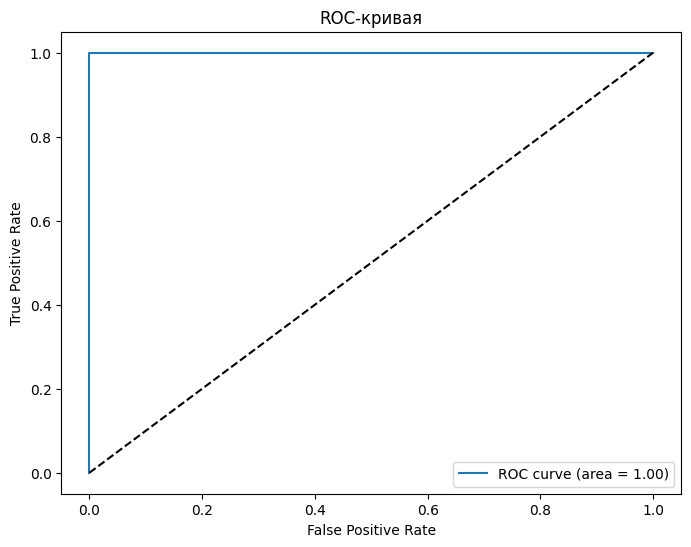

In [46]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

## ⏰ Доп задание

Изучить различные метрики качества классификационных моделей и понять, в каких ситуациях они наиболее информативны.

**Метрики для исследования:**
- Accuracy (Точность)
- Precision (Точность)
- Recall (Полнота)
- F1 Score
- ROC-AUC
- Log Loss

**Попробовать другие модели и сравнить результат метрик**

**Попробовать другие методы отбора признаков**

**Использовать параметры модели и исследовать влияние на предсказание**

## Заключение

Мы успешно построили модель логистической регрессии для предсказания лучших вин на основе химических характеристик. Преобразование данных и анализ коэффициентов модели позволили нам понять влияние различных признаков на качество вина.


---

# Примечания

- **Логистическая регрессия** является мощным инструментом для бинарной классификации и позволяет интерпретировать результаты через коэффициенты модели.
- **Преобразование категориальных признаков** (One-Hot Encoding) и **нормализация числовых признаков** являются стандартными шагами предобработки данных для многих алгоритмов машинного обучения.
- **Анализ коэффициентов модели** помогает понять, какие признаки наиболее значимы и как они влияют на предсказания.

---

# Дополнительная литература

- **Логистическая регрессия:**
  - [Документация scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- **Предобработка данных:**
  - [One-Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
  - [Min-Max Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
- **Метрики качества модели:**
  - [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
  - [ROC-кривая и AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

---